In [1]:
import os
import timm
import logging
import argparse
import pandas as pd
from typing import Optional
from datetime import datetime

import sys
sys.path.append('../')

import torch
import torch.nn as nn

from cls_utils.block import Bottleneck, TwoMLPHead, RoIPool

In [2]:
df = pd.read_csv('../lbp_data/df.csv')
df.shape

(25395, 13)

In [3]:
import cv2
from prepare_data.visualize import visualize
NUM = 1
path = df.loc[NUM].file_name
bbox = df.loc[NUM].bbox
bbox = list(map(float, (bbox[1:-1].split(','))))
print(bbox)
image = cv2.imread('../lbp_data/' + path)
image.shape

[1337.0, 102.0, 256.0, 136.0]


(2048, 2048, 3)

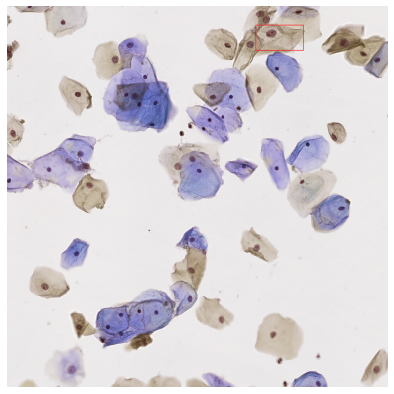

In [4]:
visualize(image, [bbox])

In [5]:
image = cv2.resize(image, (1024,1024))
image.shape

(1024, 1024, 3)

In [6]:
image = torch.tensor(image, dtype=torch.float).permute(2,0,1).unsqueeze(dim=0)
image = image/255.
#image = torch.cat([image, image], dim=1)
image.shape

torch.Size([1, 3, 1024, 1024])

In [12]:
roipool = RoIPool(( 20,20), .5) # float(1/32), boxes is not normalized

In [13]:
bbox = torch.tensor([[1337.0, 102.0, 1337.0+256.0, 102.0+136.0]], dtype=torch.float)
bbox

tensor([[1337.,  102., 1593.,  238.]])

In [14]:
roi = roipool(image, [bbox])
roi.shape

torch.Size([1, 3, 20, 20])

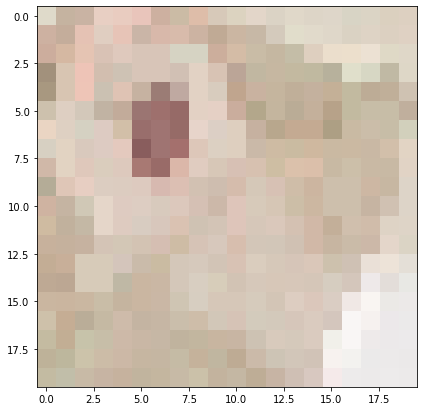

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 7))
plt.imshow(roi.squeeze().permute(1,2,0).numpy())

In [11]:
roi

tensor([[[[0.8745, 0.9098, 0.9137, 0.8471, 0.8706, 0.8902, 0.8824, 0.8824,
           0.8706, 0.8745],
          [0.8471, 0.9333, 0.8745, 0.8471, 0.8863, 0.8314, 0.7765, 0.9216,
           0.9255, 0.8745],
          [0.8706, 0.9333, 0.8745, 0.7490, 0.8980, 0.7922, 0.7725, 0.7686,
           0.7804, 0.8118],
          [0.9176, 0.8667, 0.8941, 0.6431, 0.9059, 0.8706, 0.8078, 0.8118,
           0.7961, 0.8863],
          [0.8863, 0.9059, 0.8667, 0.8627, 0.8784, 0.8431, 0.8588, 0.8588,
           0.8039, 0.8824],
          [0.8118, 0.8980, 0.8706, 0.8627, 0.8353, 0.8706, 0.8549, 0.8196,
           0.8157, 0.8706],
          [0.7843, 0.8431, 0.8314, 0.8353, 0.8431, 0.8549, 0.8392, 0.8549,
           0.9176, 0.9294],
          [0.7922, 0.8431, 0.7922, 0.8314, 0.8471, 0.8392, 0.8667, 0.8588,
           0.9765, 0.9255],
          [0.8078, 0.7804, 0.8078, 0.7922, 0.8235, 0.8392, 0.8471, 0.9451,
           0.9765, 0.9255],
          [0.7647, 0.8000, 0.8000, 0.7804, 0.7961, 0.7961, 0.8235, 0.9686

In [16]:
bbox = torch.tensor([[1337.0, 102.0, 1337.0+256.0, 102.0+136.0], [337.0, 102.0, 337.0+256.0, 102.0+136.0]], dtype=torch.float)
bbox

tensor([[1337.,  102., 1593.,  238.],
        [ 337.,  102.,  593.,  238.]])

In [17]:
roi = roipool(image, [bbox])
roi.shape

torch.Size([2, 3, 20, 20])